# Imports

In [103]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Data exploration of wind turbines in relation of extended lifetime

The data was gathered during the process of calculation of the analytical part of extended lifetime reports by the Idaswind GmbH.

## Loading data

In [2]:
data = pd.read_csv('../data/testdata.CSV', sep=';', encoding='Windows-1252')

In [3]:
data.columns

Index(['Nummer', 'Berichtsnummer', 'Angebotsnummer', 'Projektname',
       'Auftraggeber', 'Betreiber', 'Marktstammdatennummer Betreiber',
       'Marktstammdatennummer Anlage', 'GPS', 'Anzahl Nachbaranlagen', 'WZ',
       'Erstelldatum', 'Kritische Anlage', 'Trudel', 'Hersteller',
       'Entwurfsbedingungen', 'Typ', 'Inbetriebnahme',
       'Ende Entwurfslebensdauer', 'Weiterbetriebszeit', 'Nennleistung',
       'Nabenhöhe', 'Rotordurchmesser', 'Pitch/Stall', 'Ertrag',
       'Jahresertrag', 'Verfügbarkeit', 'Volllaststunden',
       'Weibbulparameter A', 'Weibbulparameter k', 'vm'],
      dtype='object')

In [4]:
col = ['GPS', 'Anzahl Nachbaranlagen', 'WZ',
       'Erstelldatum',  'Hersteller', 'Typ', 'Inbetriebnahme',
       'Ende Entwurfslebensdauer', 'Weiterbetriebszeit', 'Nennleistung',
       'Nabenhöhe', 'Rotordurchmesser', 'Ertrag',
       'Jahresertrag', 'Verfügbarkeit', 'Volllaststunden',
       'Weibbulparameter A', 'Weibbulparameter k', 'vm']

In [5]:
df = data[col]

In [6]:
df.head()

,GPS,Anzahl Nachbaranlagen,WZ,Erstelldatum,Hersteller,Typ,Inbetriebnahme,Ende Entwurfslebensdauer,Weiterbetriebszeit,Nennleistung,Nabenhöhe,Rotordurchmesser,Ertrag,Jahresertrag,Verfügbarkeit,Volllaststunden,Weibbulparameter A,Weibbulparameter k,vm
0,"51.402456, 8.020173",0.0,1,08.12.2016,Enercon,E40 5.40,15.10.1996,15.10.2016,11.0,500,65,40,37'789'760,1'874'339,99,3'749,5.75,2.01,5.10
1,"51.174768, 11.347214",1.0,2,14.02.2017,Enercon,E40 5.40,24.03.1997,24.03.2017,8.0,500,65,63,37'789'760,1'898'068,99,3'796,6.60,2.07,5.85
2,"51.175517, 11.344339",1.0,2,22.02.2017,Enercon,E40 5.40,24.03.1997,24.03.2017,8.0,500,65,40,37'789'760,1'895'981,100,3'792,6.60,2.07,5.85
3,"52.097339, 12.841408",1.0,2,13.03.2017,NEG Micon,M 1800 – 600/150 kW,14.03.1997,14.03.2017,9.0,600,60,57,25'702'687,1'284'431,90,2'141,6.04,2.39,5.35
4,"50.667414, 13.120252",2.0,2,16.03.2017,Enercon,E40 5.40,23.10.1997,23.10.2017,9.0,500,51,40,14'583'130,751'389,99,1'503,6.17,1.83,5.48


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GPS                       1002 non-null   object 
 1   Anzahl Nachbaranlagen     994 non-null    float64
 2   WZ                        1002 non-null   object 
 3   Erstelldatum              1002 non-null   object 
 4   Hersteller                1002 non-null   object 
 5   Typ                       1002 non-null   object 
 6   Inbetriebnahme            1002 non-null   object 
 7   Ende Entwurfslebensdauer  1002 non-null   object 
 8   Weiterbetriebszeit        1002 non-null   float64
 9   Nennleistung              1002 non-null   int64  
 10  Nabenhöhe                 1002 non-null   int64  
 11  Rotordurchmesser          1002 non-null   int64  
 12  Ertrag                    1002 non-null   object 
 13  Jahresertrag              1002 non-null   object 
 14  Verfügba

## Cleaning data

### GPS into Longitude and Latitude

In [8]:
# Insert columns
df.insert(1, 'Longitude', [0 for i in range(len(df.GPS))])
df.insert(2, 'Latitude', [0 for i in range(len(df.GPS))])

# Split the 'GPS' column into 'Longitude' and 'Latitude'
df.iloc[:, [1,2]] = df.iloc[:, 0].str.split(',', n=1, expand=True)

df['Latitude'] = pd.to_numeric(df['Latitude'].str.strip())
df['Longitude'] = pd.to_numeric(df['Longitude'].str.strip())

df.drop('GPS', axis=1, inplace=True)

/tmp/ipykernel_24835/4010184763.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, [1,2]] = df.iloc[:, 0].str.split(',', n=1, expand=True)
/tmp/ipykernel_24835/4010184763.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = pd.to_numeric(df['Latitude'].str.strip())
/tmp/ipykernel_24835/4010184763.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

### Anzahl Nachbaranlagen

Impute missing numbers with mean value.

In [9]:
mean_value = df['Anzahl Nachbaranlagen'].mean()
df['Anzahl Nachbaranlagen'] = df['Anzahl Nachbaranlagen'].fillna(round(mean_value))

/tmp/ipykernel_24835/2134448400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anzahl Nachbaranlagen'] = df['Anzahl Nachbaranlagen'].fillna(round(mean_value))


### Wind zone

Imputing wind zone with zero if not available.

In [10]:
df['WZ'] = df['WZ'].apply(lambda e: '2' if not e.isdigit() else e)
df['WZ'] = pd.to_numeric(df['WZ'])

/tmp/ipykernel_24835/2493692244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WZ'] = df['WZ'].apply(lambda e: '2' if not e.isdigit() else e)
/tmp/ipykernel_24835/2493692244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WZ'] = pd.to_numeric(df['WZ'])


### Dates

In [11]:
datecolumns = ['Erstelldatum', 'Inbetriebnahme', 'Ende Entwurfslebensdauer']

for d in datecolumns:
    df[d] = pd.to_datetime(df[d], format='%d.%m.%Y', errors='coerce')

/tmp/ipykernel_24835/2315357755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[d] = pd.to_datetime(df[d], format='%d.%m.%Y', errors='coerce')
/tmp/ipykernel_24835/2315357755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[d] = pd.to_datetime(df[d], format='%d.%m.%Y', errors='coerce')
/tmp/ipykernel_24835/2315357755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

### Ertrag

Impute missing numbers with mean value.

In [12]:
df['Ertrag'] = df['Ertrag'].apply(lambda e: e.replace("'",'')
                                             .replace(".",'')
                                             .replace("‘",'') if e[0].isdigit() else e)
df['Ertrag'] = df['Ertrag'].apply(lambda e: e.replace("n.V.",'')
                                             .replace("k.A.",'') if not e[0].isdigit() else e)
df['Ertrag'] = pd.to_numeric(df['Ertrag'])
mean_value = df['Ertrag'].mean()
df['Ertrag'] = df['Ertrag'].fillna(round(mean_value))

/tmp/ipykernel_24835/2180093748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ertrag'] = df['Ertrag'].apply(lambda e: e.replace("'",'')
/tmp/ipykernel_24835/2180093748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ertrag'] = df['Ertrag'].apply(lambda e: e.replace("n.V.",'')
/tmp/ipykernel_24835/2180093748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Jahresertrag

Impute missing numbers with mean value.

In [13]:
df['Jahresertrag'] = df['Jahresertrag'].apply(lambda e: e.replace("'",'')
                                                         .replace(".",'')
                                                         .replace("‘",'') if e[0].isdigit() else e)
df['Jahresertrag'] = df['Jahresertrag'].apply(lambda e: e.replace("n.V.",'')
                                                         .replace("k.A.",'')
                                                         .replace("#WERT!",'') if not e[0].isdigit() else e)
df['Jahresertrag'] = pd.to_numeric(df['Jahresertrag'])
mean_value = df['Jahresertrag'].mean()
df['Jahresertrag'] = df['Jahresertrag'].fillna(round(mean_value))

/tmp/ipykernel_24835/2073807240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jahresertrag'] = df['Jahresertrag'].apply(lambda e: e.replace("'",'')
/tmp/ipykernel_24835/2073807240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jahresertrag'] = df['Jahresertrag'].apply(lambda e: e.replace("n.V.",'')
/tmp/ipykernel_24835/2073807240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

### Verfügbarkeit

Impute missing numbers with mean value.

In [14]:
df['Verfügbarkeit'] = df['Verfügbarkeit'].apply(lambda e: e.replace("n.V.",'')
                                                         .replace("-",'')
                                                         .replace("n. V.",'')
                                                        .replace("k.A.",'') if not e[0].isdigit() else e)
df['Verfügbarkeit'] = df['Verfügbarkeit'].apply(lambda e: float(e)/100 if (not '.' in str(e)) and (e!='') and e!='1' else e)
df['Verfügbarkeit'] = pd.to_numeric(df['Verfügbarkeit'])
mean_value = df['Verfügbarkeit'].mean()
df['Verfügbarkeit'] = df['Verfügbarkeit'].fillna(round(mean_value))

/tmp/ipykernel_24835/2928825111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Verfügbarkeit'] = df['Verfügbarkeit'].apply(lambda e: e.replace("n.V.",'')
/tmp/ipykernel_24835/2928825111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Verfügbarkeit'] = df['Verfügbarkeit'].apply(lambda e: float(e)/100 if (not '.' in str(e)) and (e!='') and e!='1' else e)
/tmp/ipykernel_24835/2928825111.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

### Volllaststunden

Impute missing numbers with mean value.

In [15]:
df['Volllaststunden'] = df['Volllaststunden'].apply(lambda e: e.replace("n.V.",'')
                                                         .replace("'",'')
                                                         .replace("#WERT!",''))
df['Volllaststunden'] = pd.to_numeric(df['Volllaststunden'])
mean_value = df['Volllaststunden'].mean()
df['Volllaststunden'] = df['Volllaststunden'].fillna(round(mean_value))

/tmp/ipykernel_24835/1697994263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volllaststunden'] = df['Volllaststunden'].apply(lambda e: e.replace("n.V.",'')
/tmp/ipykernel_24835/1697994263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volllaststunden'] = pd.to_numeric(df['Volllaststunden'])
/tmp/ipykernel_24835/1697994263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

### Weibbulparameter A and k

Impute missing numbers with mean value.

In [16]:
#Weibbulparameter A
df['Weibbulparameter A'] = df['Weibbulparameter A'].apply(lambda e: str(e).replace("Standard",''))
df['Weibbulparameter A'] = pd.to_numeric(df['Weibbulparameter A'], errors='coerce')
mean_value = df['Weibbulparameter A'].mean()
df['Weibbulparameter A'] = df['Weibbulparameter A'].fillna(round(mean_value))
#Weibbulparameter k
df['Weibbulparameter k'] = pd.to_numeric(df['Weibbulparameter k'], errors='coerce')
mean_value = df['Weibbulparameter k'].mean()
df['Weibbulparameter k'] = df['Weibbulparameter k'].fillna(round(mean_value))

/tmp/ipykernel_24835/1773792987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weibbulparameter A'] = df['Weibbulparameter A'].apply(lambda e: str(e).replace("Standard",''))
/tmp/ipykernel_24835/1773792987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weibbulparameter A'] = pd.to_numeric(df['Weibbulparameter A'], errors='coerce')
/tmp/ipykernel_24835/1773792987.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

### $v_m$

Impute missing numbers with mean value.

In [17]:
df['vm'] = pd.to_numeric(df['vm'], errors='coerce')
mean_value = df['vm'].mean()
df['vm'] = df['vm'].fillna(round(mean_value))

/tmp/ipykernel_24835/2453659356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vm'] = pd.to_numeric(df['vm'], errors='coerce')
/tmp/ipykernel_24835/2453659356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vm'] = df['vm'].fillna(round(mean_value))


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Longitude                 1002 non-null   float64       
 1   Latitude                  1002 non-null   float64       
 2   Anzahl Nachbaranlagen     1002 non-null   float64       
 3   WZ                        1002 non-null   int64         
 4   Erstelldatum              1001 non-null   datetime64[ns]
 5   Hersteller                1002 non-null   object        
 6   Typ                       1002 non-null   object        
 7   Inbetriebnahme            1001 non-null   datetime64[ns]
 8   Ende Entwurfslebensdauer  1001 non-null   datetime64[ns]
 9   Weiterbetriebszeit        1002 non-null   float64       
 10  Nennleistung              1002 non-null   int64         
 11  Nabenhöhe                 1002 non-null   int64         
 12  Rotordurchmesser    

## Data exploration

General data information.

In [39]:
df.describe()

,Longitude,Latitude,Anzahl Nachbaranlagen,WZ,Weiterbetriebszeit,Nennleistung,Nabenhöhe,Rotordurchmesser,Ertrag,Jahresertrag,Verfügbarkeit,Volllaststunden,Weibbulparameter A,Weibbulparameter k,vm
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1.002000e+03,1.002000e+03,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,51.952538,10.044088,3.470060,2.236527,10.412096,1260.469062,74.759481,60.891218,3.587069e+07,1.976803e+06,0.977375,2415.931133,6.686343,2.141950,5.930259
std,1.643127,6.467713,3.545001,0.863827,5.486932,543.932824,16.596493,14.030050,2.121636e+07,1.069130e+06,0.064199,26551.608869,0.718937,0.251191,0.635056
min,35.719222,5.548194,0.000000,1.000000,-1.000000,80.000000,31.000000,19.000000,1.440970e+05,5.099000e+03,0.000000,64.000000,4.490000,1.330000,3.980000
25%,51.256367,7.349665,1.000000,2.000000,6.000000,600.000000,65.000000,47.000000,1.827769e+07,1.008846e+06,0.980000,1284.500000,6.190000,1.990000,5.490000
50%,52.010184,9.229523,3.000000,2.000000,9.000000,1500.000000,74.000000,66.000000,3.199577e+07,1.939257e+06,0.980000,1604.000000,6.595000,2.140000,5.850000
75%,53.338330,11.714512,5.000000,2.000000,13.000000,1800.000000,85.750000,70.000000,5.420689e+07,2.876806e+06,0.990000,1861.500000,7.180000,2.300000,6.370000
max,54.736670,140.767972,28.000000,4.000000,20.000000,2500.000000,115.000000,82.000000,1.247632e+08,6.197411e+06,1.000000,841916.000000,9.560000,5.550000,8.470000


Histograms for the numerical columns.

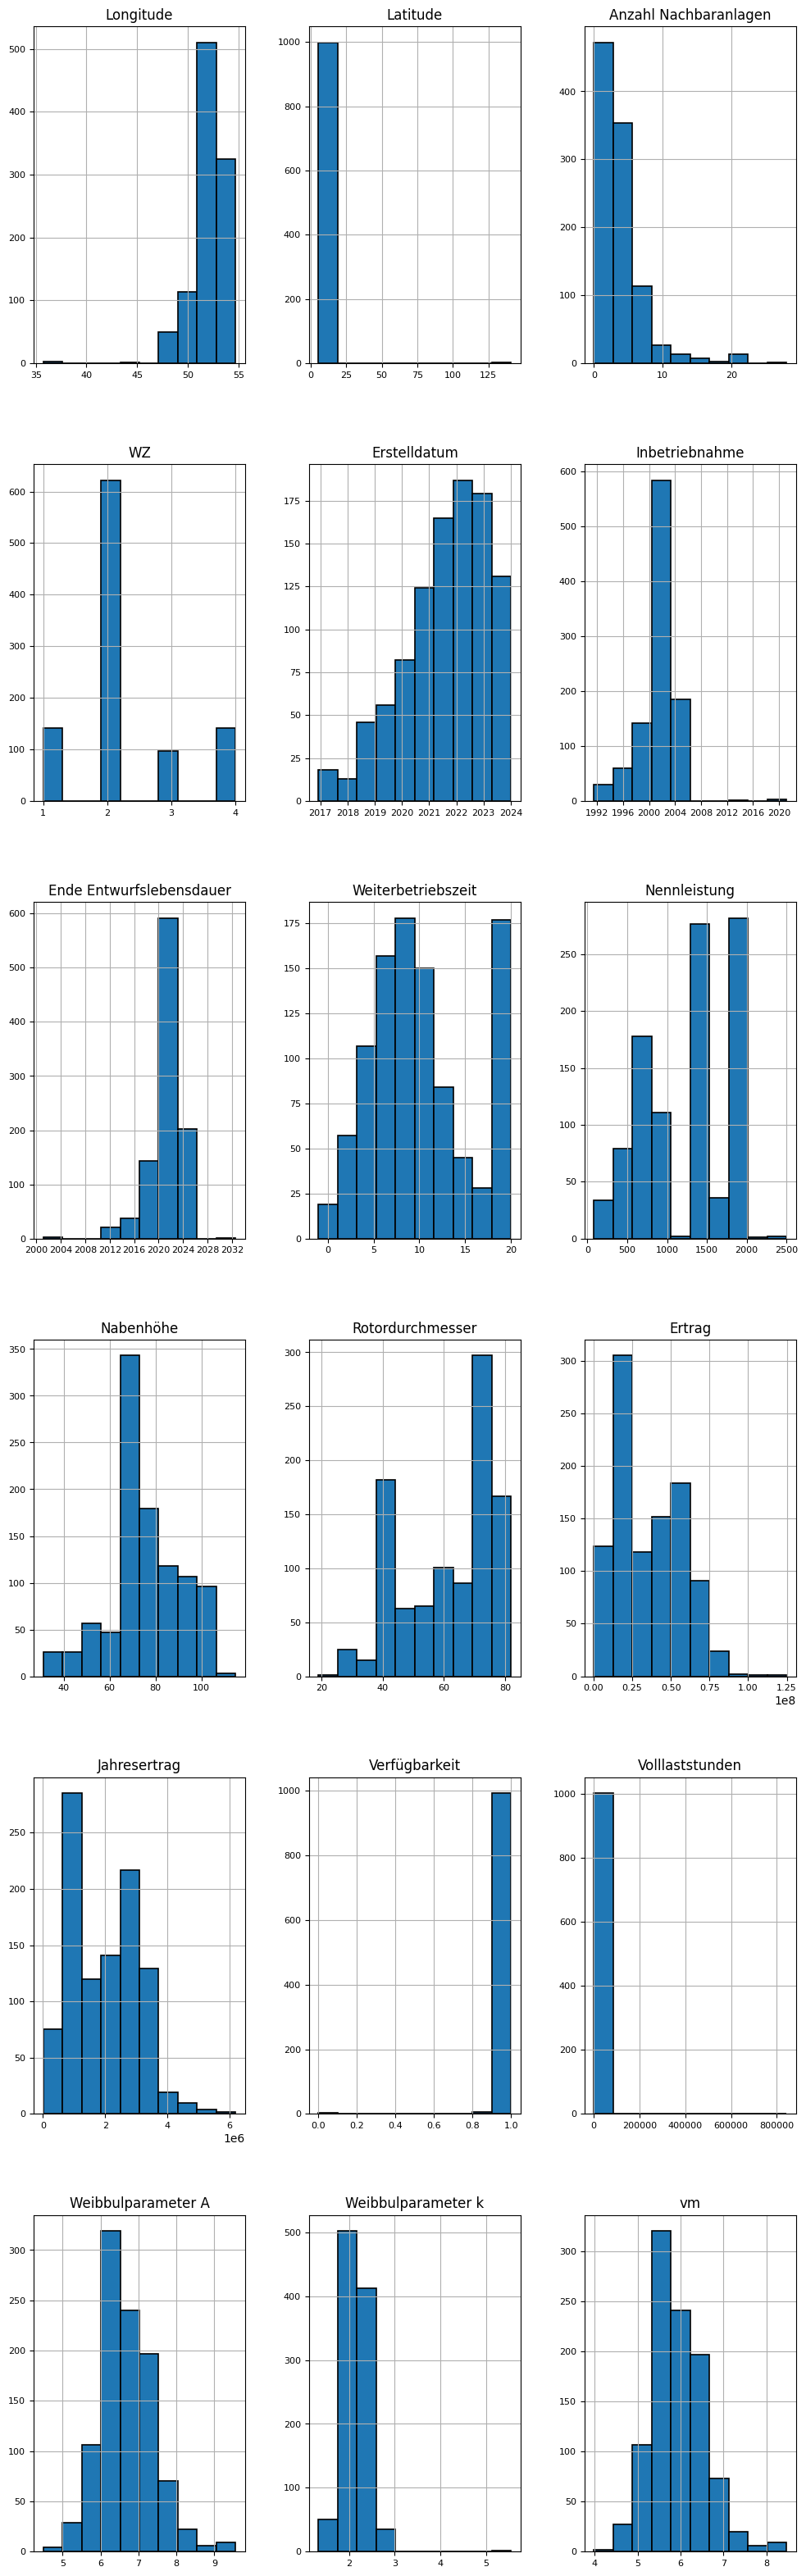

In [45]:
# Display histograms
df.hist(bins=10, edgecolor='black', linewidth=1.2, xlabelsize=8, ylabelsize=8, figsize=(12, 40), layout=(6,3))
plt.show()

Different types of turbines in the data set.

In [21]:
print(df.Typ.unique())
print('There are ', df.Typ.nunique(), 'different turbine types.')

['E40 5.40' 'M 1800 – 600/150 kW' 'E66 15.66' 'TW600e' 'V44' 'V27' 'V39'
 'N54' 'E30' 'FL 250 / astos 250' 'TW500' 'V47' 'N43' 'N27' 'E32' '1.5s'
 'TW600' 'TW600a' 'FL1000' 'E40 6.44' 'E66 18.70' 'S31' 'E58 10.58'
 'AN Bonus 2MW' 'N29' 'V66 1.65 MW' 'V80' 'N3127' 'S46' 'D6/1000'
 'NM60/1000' 'S70' 'NM 1800' 'MD70' 'N62' 'N60' 'V29' '1.3/62'
 'NTK 500/41' 'NM52' 'E33' 'NTK 500/37' 'E82' 'NM48 750' 'NTK 300/31 '
 'NM43/600' 'NTK 300/31' 'W-5200/750 kW' 'NM64c-1.5' 'V66 1.75 MW'
 '450 kW/37' 'W-2700/ 150 kW' 'N80' 'V52' '1.5sl' 'E66 18.66' 'RE48/600'
 'MD77' 'AN 1 MW/54' 'M1500-500/125' 'E18' '600/44-2c MK4' 'NM72c1500'
 'N50' 'D6/1250' 'E66 20.70' 'MM82' 'S77' 'GE 1.5s' 'MM70']
There are  70 different turbine types.


In [81]:
wttypes = []

for t in df.Typ.unique():
    print(f' Typ {t} has {len(df.Typ[df.Typ==t])} different data point(s).')
    if len(df.Typ[df.Typ==t])>49:
        wttypes.append(t)

 Typ E40 5.40 has 68 different data point(s).
 Typ M 1800 – 600/150 kW has 3 different data point(s).
 Typ E66 15.66 has 42 different data point(s).
 Typ TW600e has 10 different data point(s).
 Typ V44 has 26 different data point(s).
 Typ V27 has 2 different data point(s).
 Typ V39 has 1 different data point(s).
 Typ N54 has 3 different data point(s).
 Typ E30 has 5 different data point(s).
 Typ FL 250 / astos 250 has 1 different data point(s).
 Typ TW500 has 3 different data point(s).
 Typ V47 has 23 different data point(s).
 Typ N43 has 3 different data point(s).
 Typ N27 has 1 different data point(s).
 Typ E32 has 8 different data point(s).
 Typ 1.5s has 49 different data point(s).
 Typ TW600 has 9 different data point(s).
 Typ TW600a has 4 different data point(s).
 Typ FL1000 has 6 different data point(s).
 Typ E40 6.44 has 74 different data point(s).
 Typ E66 18.70 has 196 different data point(s).
 Typ S31 has 4 different data point(s).
 Typ E58 10.58 has 37 different data point(s

These are the wind turbine types where we have equal or more than 5 data points.

In [82]:
print(wttypes)
print('Count: ', len(wttypes))

['E40 5.40', 'E40 6.44', 'E66 18.70', 'V80', 'V52', '1.5sl']
Count:  6


Building dictionary with data frames of different WT types.

In [83]:
wt_dict = {}
for t in wttypes:
    wt_dict[t] = df[df['Typ'] == t].copy().dropna()

Length of the data frames.

In [84]:
for t in wt_dict.keys():
    print(t, len(wt_dict[t]))

E40 5.40 68
E40 6.44 74
E66 18.70 196
V80 70
V52 50
1.5sl 51


Extended lifetime and profit.

E40 5.40


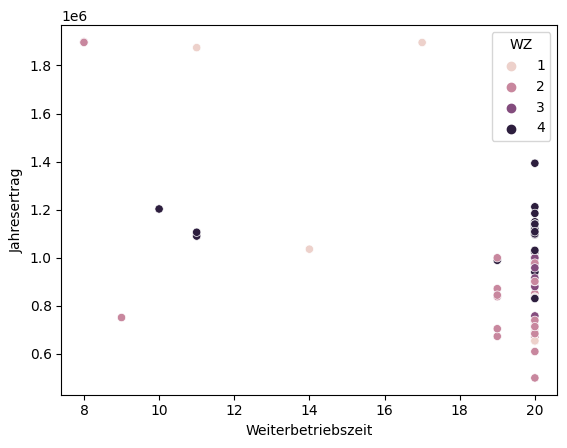

E40 6.44


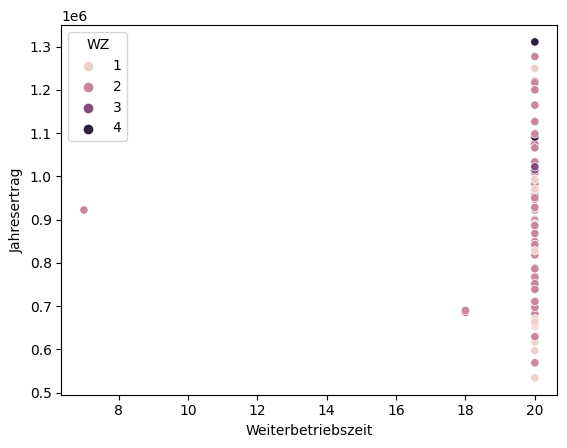

E66 18.70


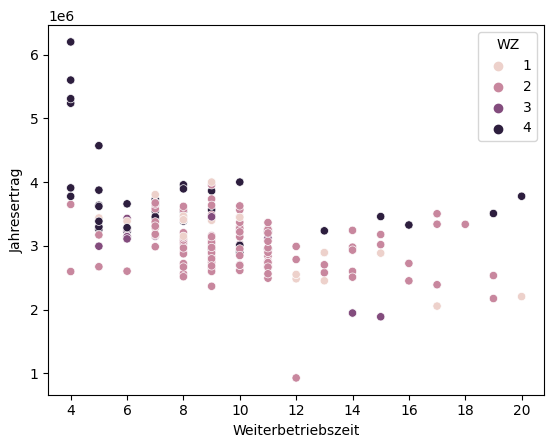

V80


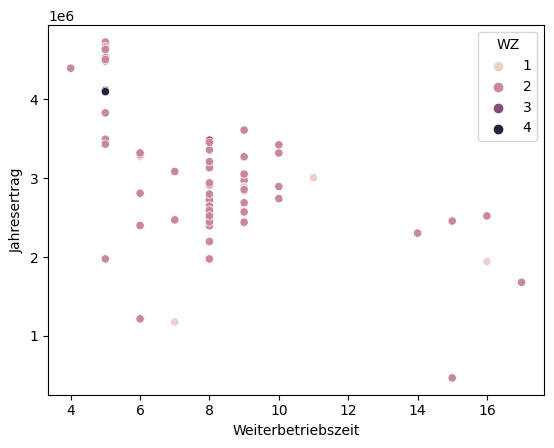

V52


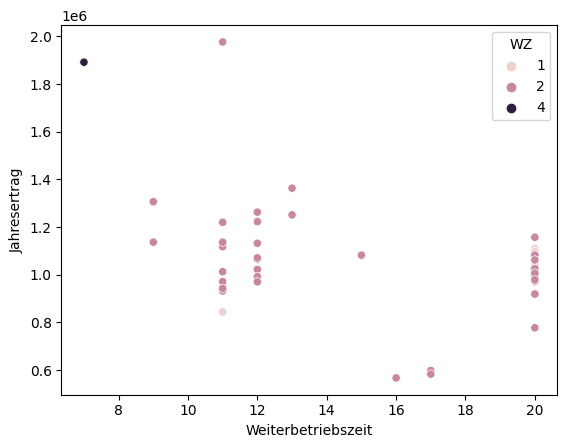

1.5sl


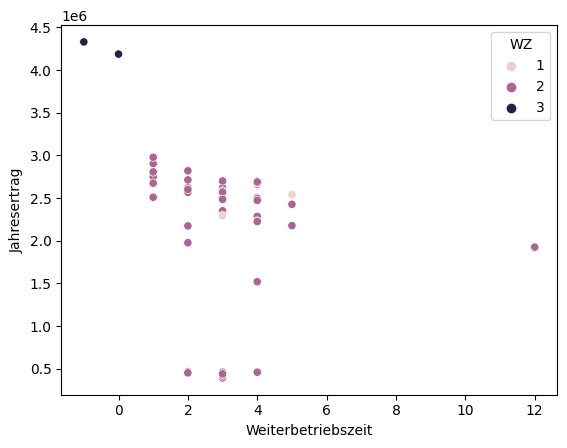

In [85]:
for t in wt_dict.keys():
    print(t)
    #plt.plot(wt_dict[t]['Weiterbetriebszeit'], wt_dict[t]['Jahresertrag'], 'bo')
    sns.scatterplot(x='Weiterbetriebszeit', y='Jahresertrag', data=wt_dict[t], hue='WZ')
    plt.show()

Extended lifetime and neighbor turbines.

E40 5.40


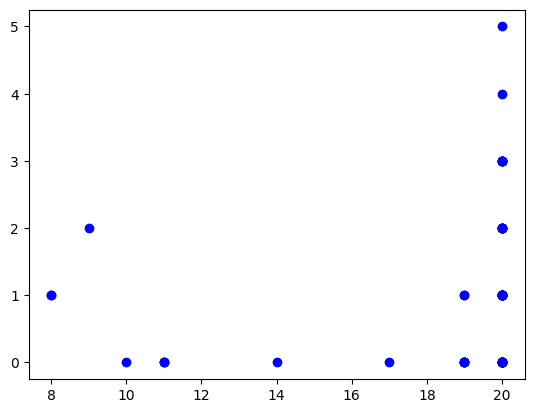

E40 6.44


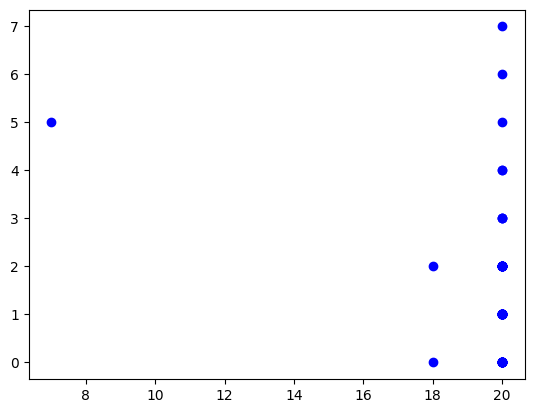

E66 18.70


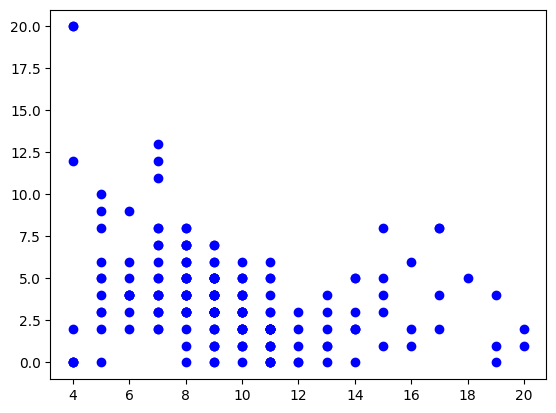

V80


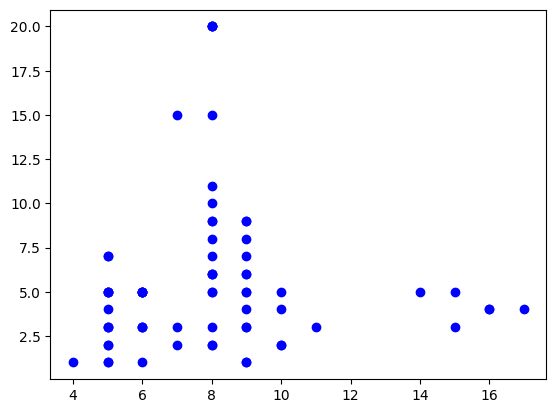

V52


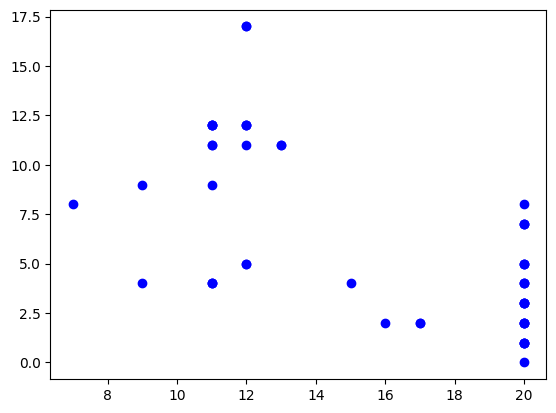

1.5sl


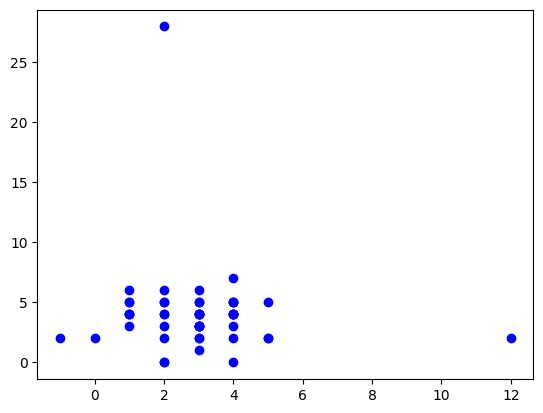

In [86]:
for t in wt_dict.keys():
    print(t)
    plt.plot(wt_dict[t]['Weiterbetriebszeit'], wt_dict[t]['Anzahl Nachbaranlagen'], 'bo')
    plt.show()

Extended lifetime and vm.

E40 5.40


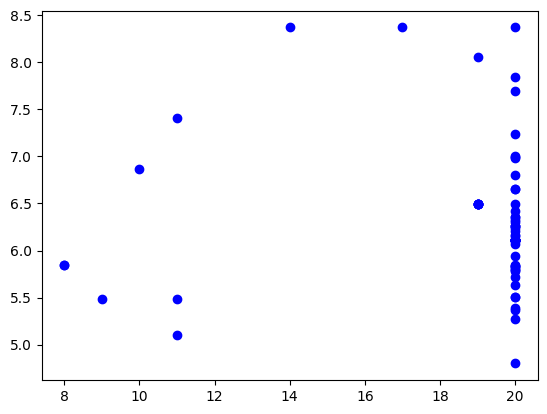

E40 6.44


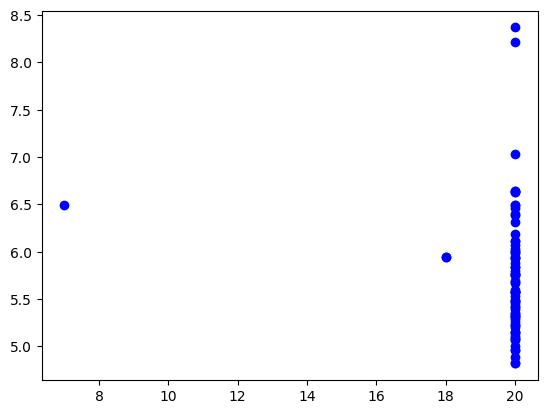

E66 18.70


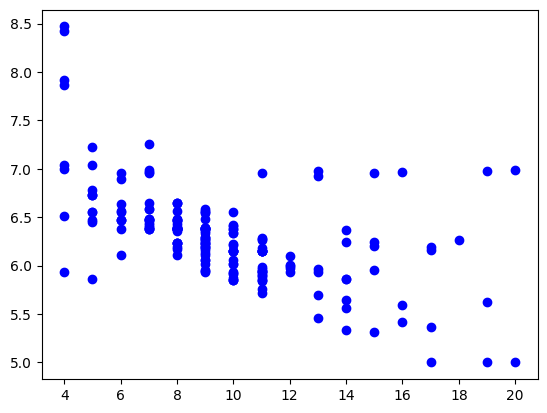

V80


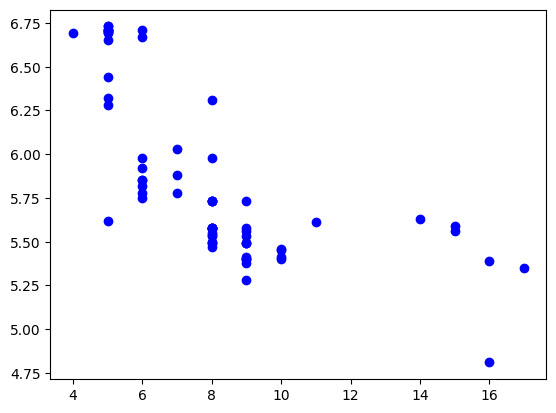

V52


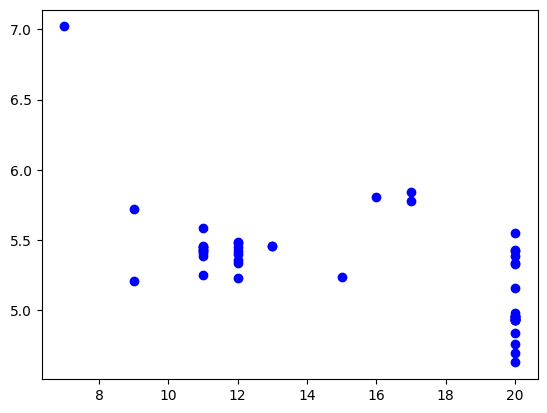

1.5sl


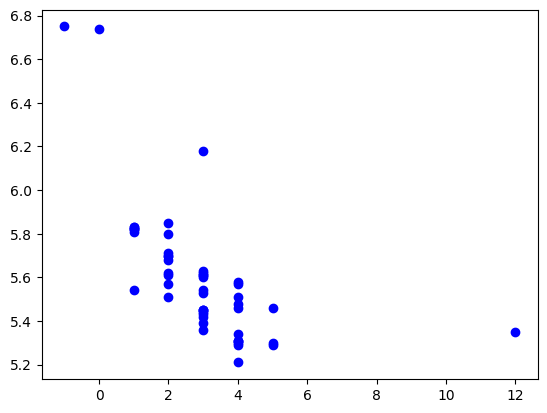

In [87]:
for t in wt_dict.keys():
    print(t)
    plt.plot(wt_dict[t]['Weiterbetriebszeit'], wt_dict[t]['vm'], 'bo')
    plt.show()

Correlation of numerical features for each turbine type.

E40 5.40


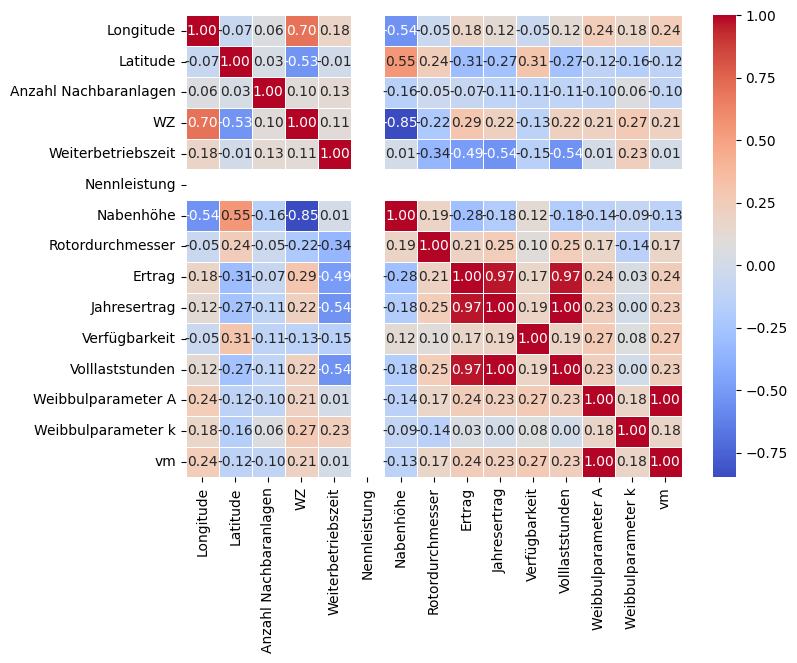

E40 6.44


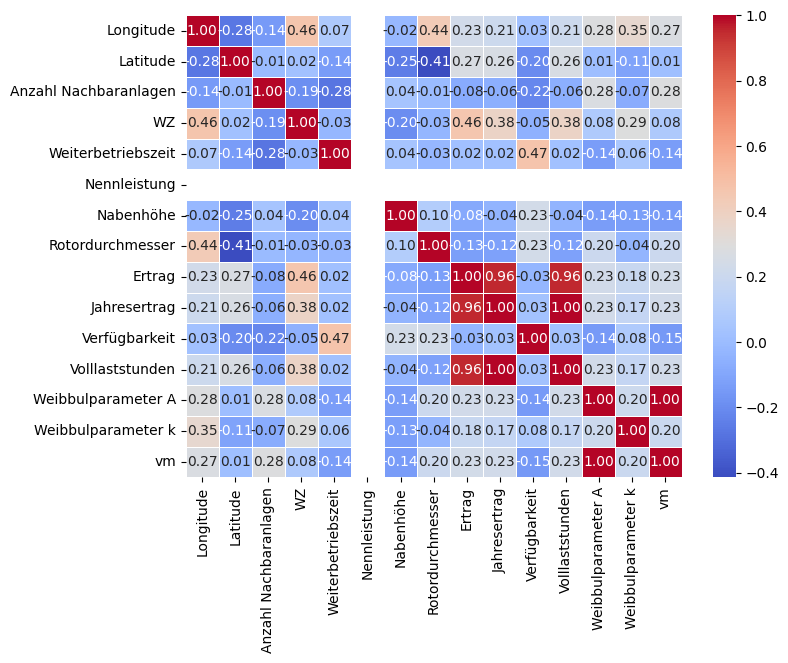

E66 18.70


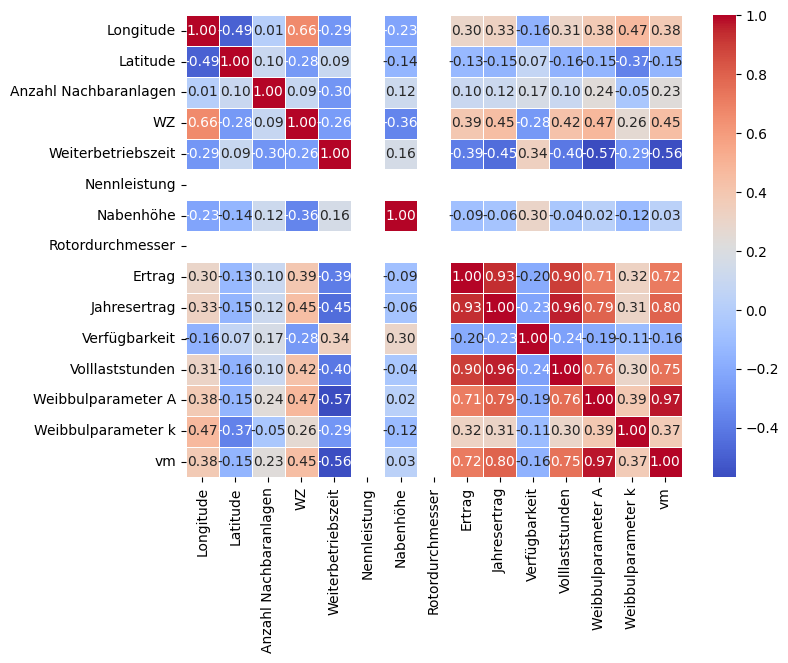

V80


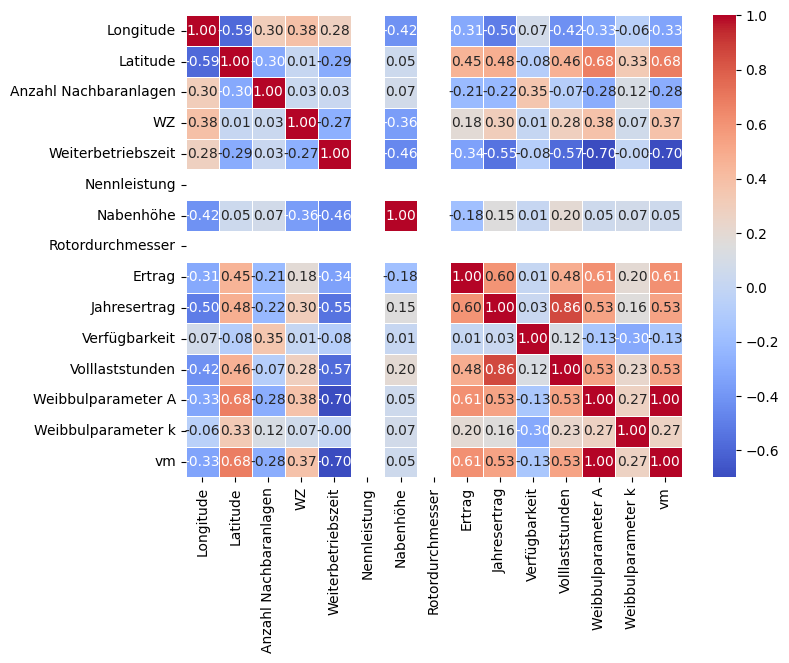

V52


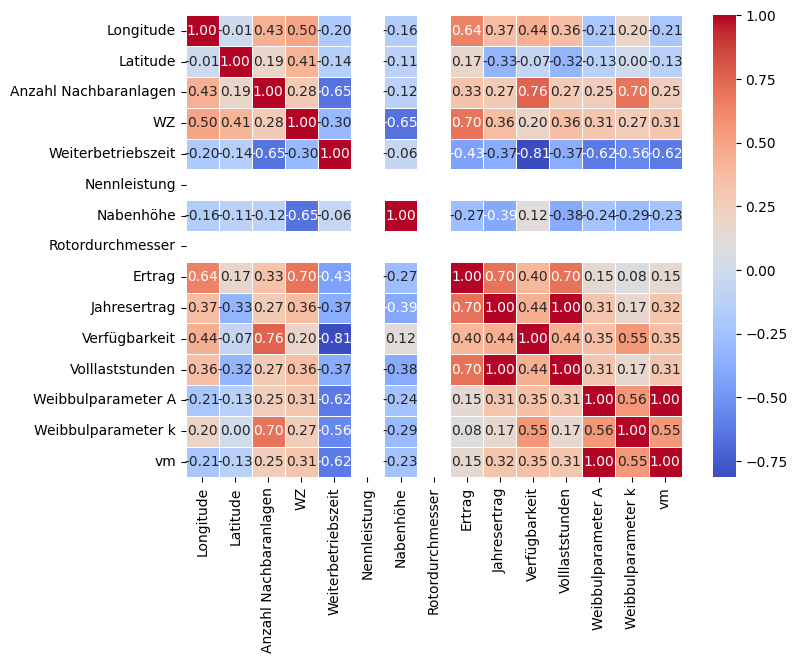

1.5sl


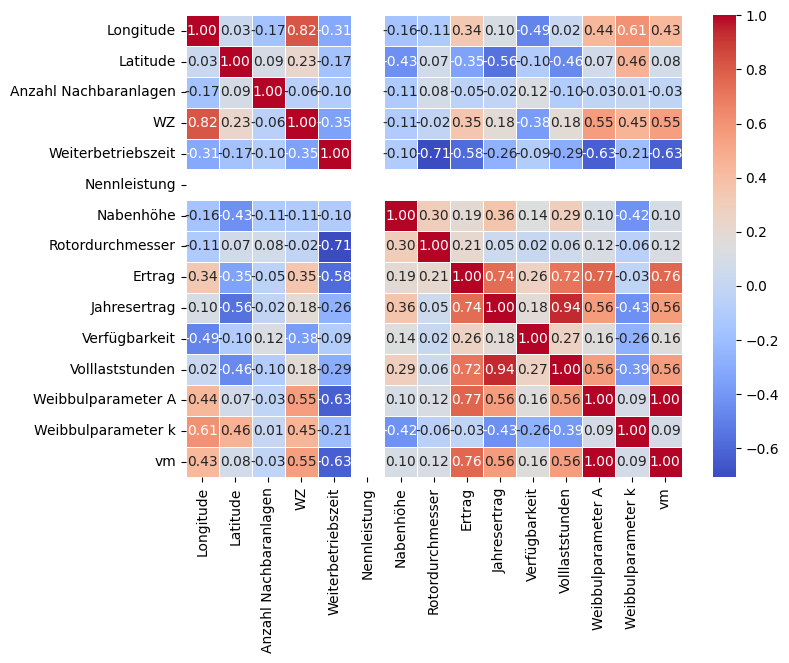

In [88]:
col = ['Longitude', 'Latitude', 'Anzahl Nachbaranlagen', 'WZ', 'Weiterbetriebszeit', 'Nennleistung', 'Nabenhöhe', 'Rotordurchmesser',
       'Ertrag', 'Jahresertrag', 'Verfügbarkeit', 'Volllaststunden',
       'Weibbulparameter A', 'Weibbulparameter k', 'vm']
for t in wt_dict.keys():
    print(t)
    # Calculate the correlation matrix
    correlation_matrix = wt_dict[t][col].corr()
    # Set up the matplotlib figure
    plt.figure(figsize=(8, 6))
    # Create a heatmap with seaborn
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) 
    # Show the plot
    plt.show()

In [89]:
for t in wt_dict.keys():
    # Calculate the correlation matrix
    correlation_matrix = wt_dict[t][col].corr()
    print(t,':')
    print(wt_dict[t][col].corr()['Weiterbetriebszeit'].sort_values())

E40 5.40 :
Volllaststunden         -0.544105
Jahresertrag            -0.544037
Ertrag                  -0.492029
Rotordurchmesser        -0.339828
Verfügbarkeit           -0.152822
Latitude                -0.007794
vm                       0.009607
Nabenhöhe                0.009885
Weibbulparameter A       0.010423
WZ                       0.111529
Anzahl Nachbaranlagen    0.131202
Longitude                0.180788
Weibbulparameter k       0.232470
Weiterbetriebszeit       1.000000
Nennleistung                  NaN
Name: Weiterbetriebszeit, dtype: float64
E40 6.44 :
Anzahl Nachbaranlagen   -0.280093
Latitude                -0.141084
vm                      -0.136333
Weibbulparameter A      -0.135564
WZ                      -0.025880
Rotordurchmesser        -0.025035
Ertrag                   0.019913
Volllaststunden          0.024301
Jahresertrag             0.024375
Nabenhöhe                0.042369
Weibbulparameter k       0.059263
Longitude                0.071867
Verfügbarkeit      

In [90]:
for t in wt_dict.keys():
    # Display missing values count
    print(wt_dict[t].isnull().sum())

Longitude                   0
Latitude                    0
Anzahl Nachbaranlagen       0
WZ                          0
Erstelldatum                0
Hersteller                  0
Typ                         0
Inbetriebnahme              0
Ende Entwurfslebensdauer    0
Weiterbetriebszeit          0
Nennleistung                0
Nabenhöhe                   0
Rotordurchmesser            0
Ertrag                      0
Jahresertrag                0
Verfügbarkeit               0
Volllaststunden             0
Weibbulparameter A          0
Weibbulparameter k          0
vm                          0
dtype: int64
Longitude                   0
Latitude                    0
Anzahl Nachbaranlagen       0
WZ                          0
Erstelldatum                0
Hersteller                  0
Typ                         0
Inbetriebnahme              0
Ende Entwurfslebensdauer    0
Weiterbetriebszeit          0
Nennleistung                0
Nabenhöhe                   0
Rotordurchmesser           

# Models

## Linear Regression model

Creating a linear regression model for each type to predict extended lifetime.

In [100]:
#features = ['Longitude', 'Latitude', 'Anzahl Nachbaranlagen', 'Jahresertrag']
features = ['WZ', 'Anzahl Nachbaranlagen', 'Jahresertrag']
target = ['Weiterbetriebszeit']

In [101]:
for t in wt_dict.keys():
    print('Model: ', t)
    print('Count data points:', len(wt_dict[t]))
    #Split the data
    X = wt_dict[t][features]  # Features
    y = wt_dict[t][target]  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    #Instantiate the logistic regression model
    model = LinearRegression(n_jobs=-1)
    
    #Fit the model
    model.fit(X_train, y_train)
    
    #Make predictions
    y_pred = model.predict(X_test)
    
    #Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    #r2 = r2_score(y_test, y_pred)
    
    #Display evaluation metrics
    print(f'Coefficients: {model.coef_}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    #print(f'R-squared (R2): {r2}')
    print('\n')

Model:  E40 5.40
Count data points: 68
Coefficients: [[ 9.22961777e-01  1.23106657e-01 -7.93236015e-06]]
Mean Squared Error (MSE): 8.810348114984112
Mean Absolute Error (MAE): 1.7988910209088644


Model:  E40 6.44
Count data points: 74
Coefficients: [[-2.36852410e-01 -3.28633058e-01  4.29058260e-07]]
Mean Squared Error (MSE): 0.09612603142177936
Mean Absolute Error (MAE): 0.27412117025079796


Model:  E66 18.70
Count data points: 196
Coefficients: [[-3.78885033e-02 -2.97904695e-01 -2.28554538e-06]]
Mean Squared Error (MSE): 11.468466521132626
Mean Absolute Error (MAE): 2.382747189497332


Model:  V80
Count data points: 70
Coefficients: [[-8.89494449e-01 -5.50470947e-02 -1.68884924e-06]]
Mean Squared Error (MSE): 0.9993930190969069
Mean Absolute Error (MAE): 0.8042231351993591


Model:  V52
Count data points: 50
Coefficients: [[-1.18748732e+00 -5.80162706e-01 -4.14216953e-06]]
Mean Squared Error (MSE): 19.360160911522264
Mean Absolute Error (MAE): 3.391750692210769


Model:  1.5sl
Count

Lasso model

In [102]:
for t in wt_dict.keys():
    print('Model: ', t)
    print('Count data points:', len(wt_dict[t]))
    #Split the data
    X = wt_dict[t][features]  # Features
    y = wt_dict[t][target]  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    #Instantiate the lasso regression model
    model = Lasso()
    
    #Fit the model
    model.fit(X_train, y_train)
    
    #Make predictions
    y_pred = model.predict(X_test)
    
    #Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    #r2 = r2_score(y_test, y_pred)
    
    #Display evaluation metrics
    print(f'Coefficients: {model.coef_}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    #print(f'R-squared (R2): {r2}')
    print('\n')

Model:  E40 5.40
Count data points: 68
Coefficients: [ 0.00000000e+00  0.00000000e+00 -6.84841819e-06]
Mean Squared Error (MSE): 5.2916704270807875
Mean Absolute Error (MAE): 1.8751915100492167


Model:  E40 6.44
Count data points: 74
Coefficients: [-0.00000000e+00 -0.00000000e+00  2.35857041e-07]
Mean Squared Error (MSE): 0.06954683671207562
Mean Absolute Error (MAE): 0.2598634252527803


Model:  E66 18.70
Count data points: 196
Coefficients: [-0.00000000e+00 -1.87205018e-01 -2.38475092e-06]
Mean Squared Error (MSE): 11.269670139640251
Mean Absolute Error (MAE): 2.453214907171538


Model:  V80
Count data points: 70
Coefficients: [-0.00000000e+00 -1.25584493e-02 -1.77258754e-06]
Mean Squared Error (MSE): 0.7065537682220951
Mean Absolute Error (MAE): 0.69010856716352


Model:  V52
Count data points: 50
Coefficients: [-0.00000000e+00 -5.52064234e-01 -5.11824081e-06]
Mean Squared Error (MSE): 16.88936429698377
Mean Absolute Error (MAE): 3.3066149344873623


Model:  1.5sl
Count data points

## Random Forrest

In [128]:
for t in wt_dict.keys():
    print('Model: ', t)
    print('Count data points:', len(wt_dict[t]))
    #Split the data
    X = wt_dict[t][features]  # Features
    y = wt_dict[t][target]  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    #Instantiate the random forest model
    model = RandomForestRegressor(n_estimators=20, max_depth=4, min_samples_split=2, random_state=42)
    
    #Fit the model
    model.fit(X_train, y_train)
    
    #Make predictions
    y_pred = model.predict(X_test)
    
    #Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    #r2 = r2_score(y_test, y_pred)
    
    #Display evaluation metrics
    #print(f'Coefficients: {model.coef_}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    #print(f'R-squared (R2): {r2}')
    print('\n')

Model:  E40 5.40
Count data points: 68
Mean Squared Error (MSE): 5.917198345046559
Mean Absolute Error (MAE): 1.3241689554436304


Model:  E40 6.44
Count data points: 74
Mean Squared Error (MSE): 0.011250000000000053
Mean Absolute Error (MAE): 0.03750000000000009


Model:  E66 18.70
Count data points: 196
Mean Squared Error (MSE): 10.110167769086525
Mean Absolute Error (MAE): 2.4531966703538313


Model:  V80
Count data points: 70
Mean Squared Error (MSE): 1.155813045697339
Mean Absolute Error (MAE): 0.8196014275956233


Model:  V52
Count data points: 50
Mean Squared Error (MSE): 1.8025535838775841
Mean Absolute Error (MAE): 0.9448983516483516


Model:  1.5sl
Count data points: 51
Mean Squared Error (MSE): 1.0211294347753743
Mean Absolute Error (MAE): 0.9703525489441412




/home/fs/.pyenv/versions/3.10.6/envs/test1/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/fs/.pyenv/versions/3.10.6/envs/test1/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/fs/.pyenv/versions/3.10.6/envs/test1/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/fs/.pyenv/versions/3.10.6/envs/test1/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionW